In [30]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/Incepv3con'

Mounted at /content/gdrive


In [31]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [33]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!ls "/content/gdrive/My Drive/Incepv3con"

test  train  validation


In [35]:
import cv2
import tensorflow
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Nadam
import keras
from keras import layers
from keras import models
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image 
from keras.models import Model
from keras import backend as K 
from keras.preprocessing import image
from keras.layers import Activation, Dense
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import ZeroPadding2D
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator 
import os 
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from keras.utils.vis_utils import plot_model

In [37]:
import keras
import keras.utils
from keras import utils as np_utils

In [38]:
from keras.utils.vis_utils import plot_model

In [39]:
from tensorflow.keras import utils as np_utils

In [40]:
#directory of the dataset
base_dir = '/content/gdrive/My Drive/Incepv3con'

train_dir = '/content/gdrive/My Drive/Incepv3con/train'
validation_dir = '/content/gdrive/My Drive/Incepv3con/validation'
test_dir = '/content/gdrive/My Drive/Incepv3con/test'

In [47]:
#create the base pre_trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

#adding a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

#adding fully connected layer
x = Dense(1024, activation='relu')(x)


#adding a logistic output layer
predictions = Dense(1, activation = 'sigmoid')(x)

#to train 
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

#train only top layers
#freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
  layer.trainable = False 
  

#compile the model 
model.compile(optimizer = RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['acc'])

#choose to train top 2 inception blocks, i.e to freeze 

# call each layers to observe which to freeze or upfreeze
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True
  
#compile the model 
model.compile(loss='binary_crossentropy',
              optimizer=Nadam(),
              metrics=['acc'])

#add data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

print(train_dir)
print(validation_dir)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299,299),
    batch_size=4,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(299,299),
    batch_size=4,
    class_mode='binary')


history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=10,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=10)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_188 (Conv2D)            (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_188 (Batch  (None, None, None,   96         ['conv2d_188[0][0]']             
 Normalization)                 32)                                                         

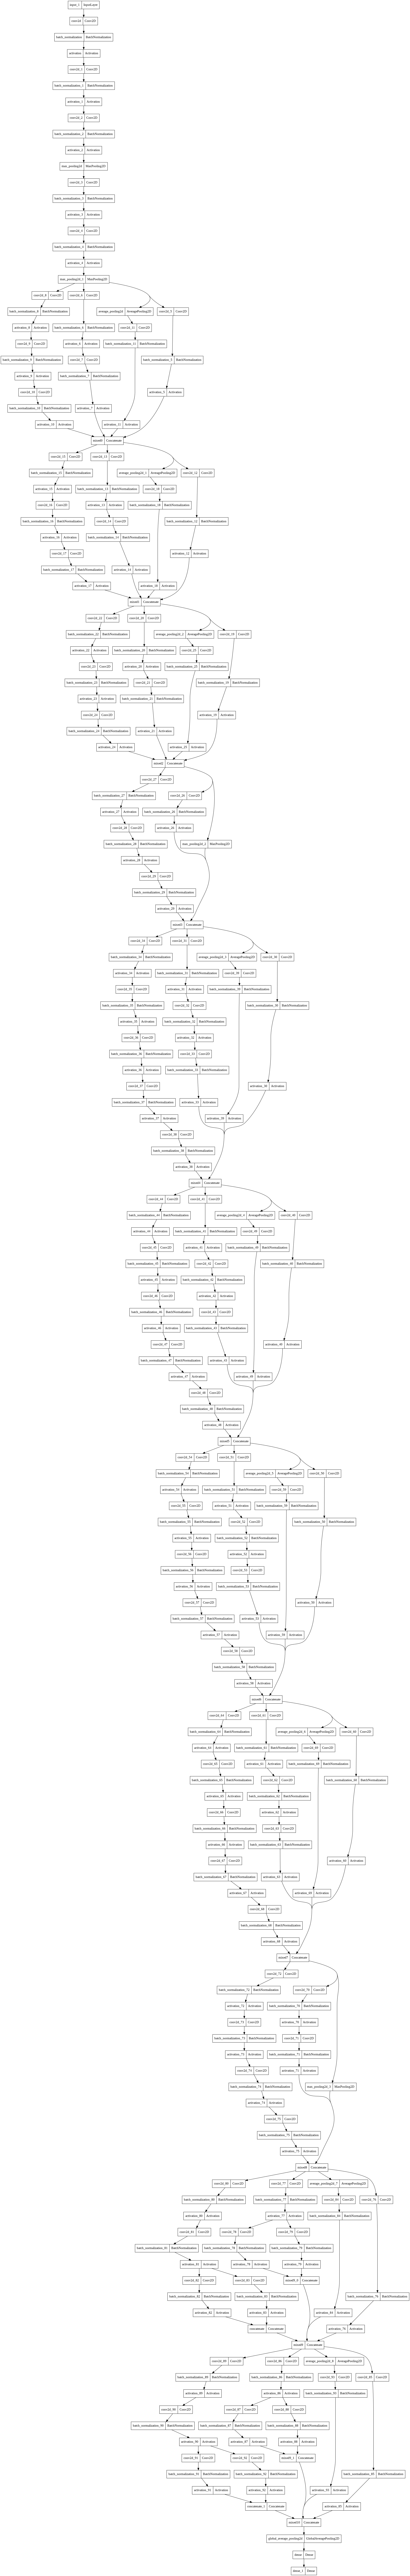

In [22]:
tf.keras.utils.plot_model(model)

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
#print(history.history.keys())
#  "Accuracy"
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
# "Loss"
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
#plt.show()

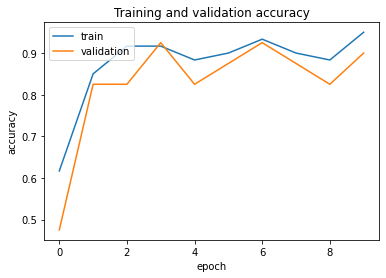

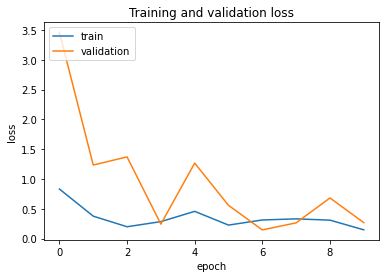

In [49]:
# Plot Training History.
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('inv3_cnn_basic_accuracy', dpi=250)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('inv3_cnn_basic_loss', dpi=250)
plt.show()

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299,299),
    batch_size=4,
    class_mode='binary')

#finally evaluate this model on the test data
results = model.evaluate(
    test_generator,
    steps=10)

print('Final test accuracy:', (results[1]*100.0))
 

Found 60 images belonging to 2 classes.
10/10 [==============================] - 1s 68ms/step - loss: 0.0691 - acc: 0.9500
Final test accuracy: 94.9999988079071


In [64]:
#Saving the model
model.save('/content/gdrive/MyDrive/incepv3con.h5')

In [ ]:
#Additional stuff after this.

In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(validation_generator, nb_validation_samples // 
batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

NameError: ignored

In [ ]:
def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    test_pred_raw = model.predict(test_images)
    
    test_pred = np.argmax(test_pred_raw, axis=1)
    
    # Calculate the confusion matrix using sklearn.metrics
    cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
    
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [ ]:
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
# Start TensorBoard.
#%tensorboard --logdir logs/image
# Train the classifier.
model.fit(train_images,
          train_labels,
          epochs=5,
          verbose=0, # Suppress chatty output
          callbacks=[tensorboard_callback, cm_callback],
          validation_data=(test_images, test_labels))

NameError: ignored